# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### MonteCarlo_NVT
In questa cartella è presente l'implementazione del codice relativo alla settima esercitazione.  
La struttura del codice non è molto diversa da quella usata per l'esercitazione 04 e 06. Inoltre viene studiato lo stesso sistema fisico della quarta esercitazione ma nell'insieme canonico, per cui a differenza della simulazione di Molecular Dynamics, la simulazione Monte Carlo non deve raggiungere la temperatura di equilibrio. Inoltre per campionare le configurazioni del sistema si utilizza il metodo di Metropolis (già ampiamente descritto, e segue lo stesso schema della esercitazione 06). Per cui le configurazioni ottenute una di seguito all'altra non rappresentano la traiettoria del sistema (come invece accadeva per l'esercitazione 04). L'obbiettivo è infatti la misura di quantità fisiche medie.    
Tutte le simulazioni che usano il metodo MC devono prima essere equilibrate, come mostrano i primi grafici presenti nel notebook e come abbiamo già constatato nelle scorse esercitazioni.   
Nella seconda parte, osservando simulazioni MC equilibrate, viene calcolata la lunghezza di correlazione fittando la funzione di auto-correlazione con un esponenziale. Tale lunghezza restituisce un'idea di quanto debbano essere grandi i blcchi per analizzare le quantità fisiche studiate con il metodo di analisi blocking.    

### Exercise 07.1

Use the Monte Carlo NVT code we have provided to print out instantaneous values of potential energy per particle, $U/N$, and pressure, $P$, along **equilibrated** Monte Carlo simulations (of  $M=10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ and $P$ to obtain the Monte Carlo correlation time</span> via a fit with an exponential function. This will suggest you how large should be the blocks in your simulations.


## NOT EQUILIBRATED 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(15, 10)) ##row pot and press

name = "_instepot.out","_instpress.out"
name1 = "liquid","solid","gas"

for i in range(2):
    for j in range(3):
        pot = np.loadtxt("equilibration/"+name1[j]+name[0],usecols=(0), delimiter=' ', unpack='true')
        press = np.loadtxt("equilibration/"+name1[j]+name[1],usecols=(0), delimiter=' ', unpack='true')
        x = np.arange(len(pot))
        if (i==0) :
            axs[i][j].plot(x,pot)
            axs[i][j].set_title(name1[j])
            axs[i][j].set_ylabel("Potential Energy")
        else:
            axs[i][j].plot(x,press)
            axs[i][j].set_ylabel("Pressure")
        axs[i][j].set_xlabel("Total thorwns")

plt.show()

<Figure size 1500x1000 with 6 Axes>

#### COMMENTO
Come per l'esercitazione 06 gli step necessari per raggiungere l'equilibrazione sono davvero pochi paragonati a l'intera simulazione.  

## EQUILIBRATED
  
Dopo che è stato equilibrato, come già anticipato sopra, viene calcolata la funzione di autocorrelazione per i valori istantanei di:
- Pressione P
- Energia potenziale (Potenziale di Lennard-Jones) $V_{LJ}$  
  
I sistemi analizzati sono (in ordine):  
- liquido
- solido
- gas

optimized parameters [a,l] = [0.92509757 6.41190134] , parameters uncertainty = [0.03362692 0.43870312]
optimized parameters [a,l] = [0.92862945 7.62210885] , parameters uncertainty = [0.03013746 0.50264509]


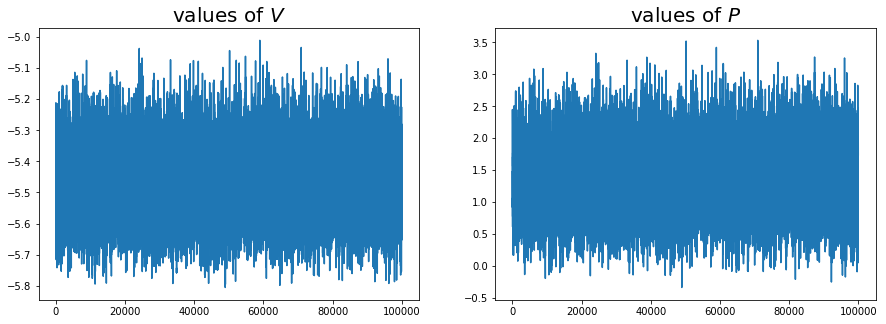

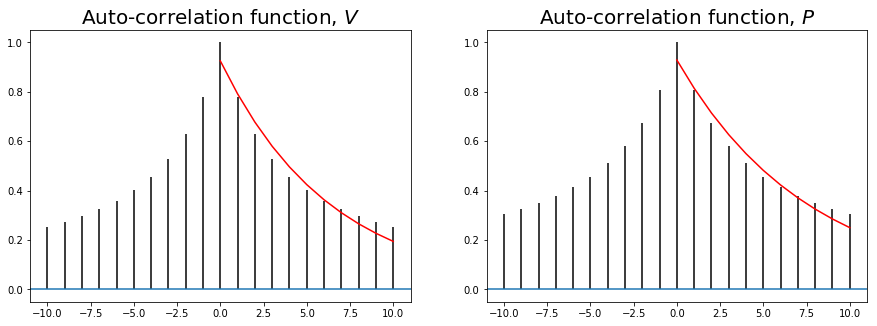

In [2]:
def f1(x,a,l):  # defining the fitting function
    return a * np.exp(-x/l)

pot = np.loadtxt("autocorr/liquid_instepot.out",usecols=(0), delimiter=' ', unpack='true')
press = np.loadtxt("autocorr/liquid_instpress.out",usecols=(0), delimiter=' ', unpack='true')

################ INSTANTANEOUS VALUES #################

x = np.arange(len(pot))
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
axs[0].plot(x,pot)
axs[0].set_title("values of $V$",fontsize=20)
axs[1].plot(x,press)
axs[1].set_title("values of $P$",fontsize=20)

#########################################################

Av_pot = np.average(pot)
Av_press = np.average(press)
pot_base = pot-Av_pot
press_base = press-Av_press

################ AUTO-CORRELATION ##################################

fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
xir = axs[0].acorr(pot_base[1000:],normed=True,maxlags=10)
x = xir[0][10:]
p_opt, p_cov = curve_fit(f1,x,xir[1][10:])#,bounds=([0,1],[2,3]))
f_fit = f1(x,p_opt[0],p_opt[1])
axs[0].plot(x,f_fit,color="r")
axs[0].set_title("Auto-correlation function, $V$",fontsize=20)
print("optimized parameters [a,l] =",p_opt,", parameters uncertainty =",np.sqrt(np.diagonal(p_cov)))
yir = axs[1].acorr(press_base[1000:],normed=True,maxlags=10)
x = yir[0][10:]
p_opt, p_cov = curve_fit(f1,x,yir[1][10:])#,bounds=([0,1],[2,3]))
f_fit = f1(x,p_opt[0],p_opt[1])
axs[1].plot(x,f_fit,color="r")
axs[1].set_title("Auto-correlation function, $P$",fontsize=20)
print("optimized parameters [a,l] =",p_opt,", parameters uncertainty =",np.sqrt(np.diagonal(p_cov)))

plt.show()

### LIQUID
- $l \approx 6$ per V
- $l \approx 8$ per P

optimized parameters [a,l] = [0.88142045 8.8180119 ] , parameters uncertainty = [0.023519   0.35180417]
optimized parameters [a,l] = [0.88642015 8.59174268] , parameters uncertainty = [0.02320022 0.33670322]


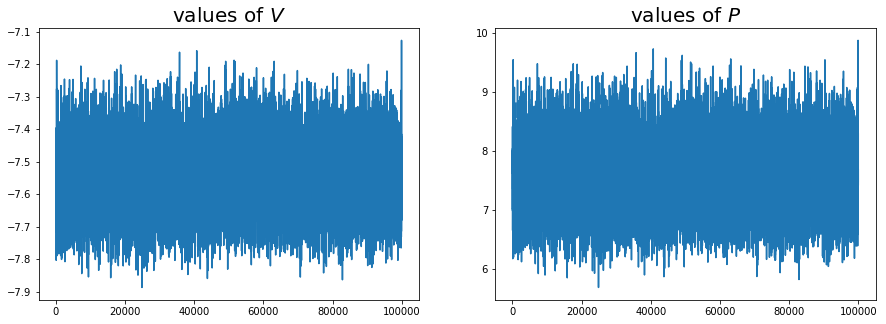

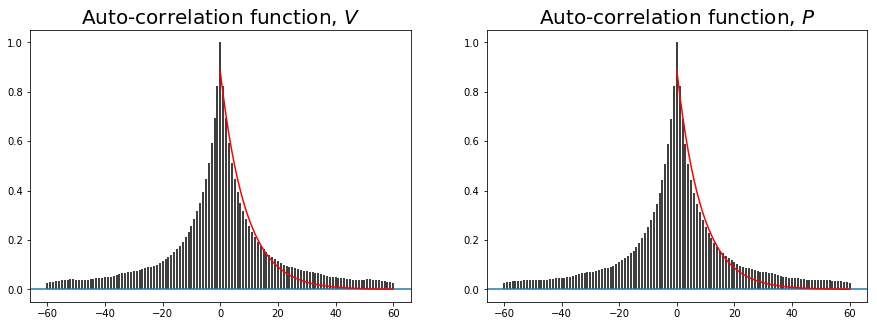

In [3]:
pot = np.loadtxt("autocorr/solid_instepot.out",usecols=(0), delimiter=' ', unpack='true')
press = np.loadtxt("autocorr/solid_instpress.out",usecols=(0), delimiter=' ', unpack='true')

################ INSTANTANEOUS VALUES #################

x = np.arange(len(pot))
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
axs[0].plot(x,pot)
axs[0].set_title("values of $V$",fontsize=20)
axs[1].plot(x,press)
axs[1].set_title("values of $P$",fontsize=20)

######################################################

Av_pot = np.average(pot)
Av_press = np.average(press)
pot_base = pot-Av_pot
press_base = press-Av_press

################ AUTO-CORRELATION ##################################
                         
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
xir = axs[0].acorr(pot_base[1000:],normed=True,maxlags=60)
x = xir[0][60:]
p_opt, p_cov = curve_fit(f1,x,xir[1][60:])#,bounds=([0,1],[2,3]))
f_fit = f1(x,p_opt[0],p_opt[1])
axs[0].plot(x,f_fit,color="r")
axs[0].set_title("Auto-correlation function, $V$",fontsize=20)
print("optimized parameters [a,l] =",p_opt,", parameters uncertainty =",np.sqrt(np.diagonal(p_cov)))
yir = axs[1].acorr(press_base[1000:],normed=True,maxlags=60)
x = yir[0][60:]
p_opt, p_cov = curve_fit(f1,x,yir[1][60:])#,bounds=([0,1],[2,3]))
f_fit = f1(x,p_opt[0],p_opt[1])
axs[1].plot(x,f_fit,color="r")
axs[1].set_title("Auto-correlation function, $P$",fontsize=20)
print("optimized parameters [a,l] =",p_opt,", parameters uncertainty =",np.sqrt(np.diagonal(p_cov)))

plt.show()

### SOLID
- $l \approx 9$ per V
- $l \approx 9$ per P

optimized parameters [a,l] = [ 0.95995297 34.89488613] , parameters uncertainty = [0.01657172 5.35032843]
optimized parameters [a,l] = [0.91573177 3.92483215] , parameters uncertainty = [0.0255614 0.1750554]


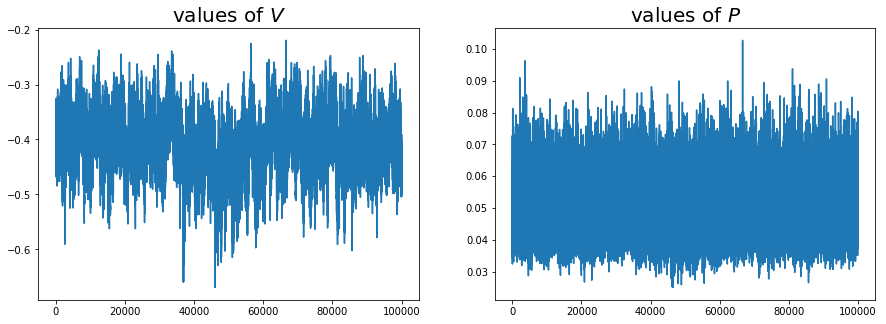

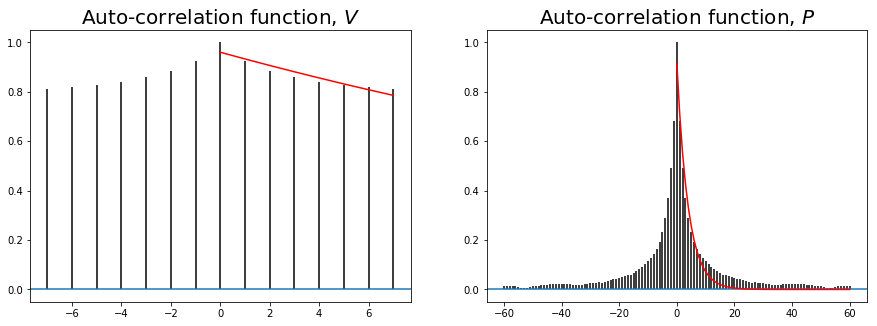

In [4]:
pot = np.loadtxt("autocorr/gas_instepot.out",usecols=(0), delimiter=' ', unpack='true')
press = np.loadtxt("autocorr/gas_instpress.out",usecols=(0), delimiter=' ', unpack='true')

################ INSTANTANEOUS VALUES #################

x = np.arange(len(pot))
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
axs[0].plot(x,pot)
axs[0].set_title("values of $V$",fontsize=20)
axs[1].plot(x,press)
axs[1].set_title("values of $P$",fontsize=20)

##################################################

Av_pot = np.average(pot)
Av_press = np.average(press)
pot_base = pot-Av_pot
press_base = press-Av_press

################ AUTO-CORRELATION ##################################
                         
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
xir = axs[0].acorr(pot_base[1000:],normed=True,maxlags=7)
x = xir[0][7:]
p_opt, p_cov = curve_fit(f1,x,xir[1][7:])#,bounds=([0,1],[2,3]))
f_fit = f1(x,p_opt[0],p_opt[1])
axs[0].plot(x,f_fit,color="r")
axs[0].set_title("Auto-correlation function, $V$",fontsize=20)
print("optimized parameters [a,l] =",p_opt,", parameters uncertainty =",np.sqrt(np.diagonal(p_cov)))
yir = axs[1].acorr(press_base[1000:],normed=True,maxlags=60)
x = yir[0][60:]
p_opt, p_cov = curve_fit(f1,x,yir[1][60:])#,bounds=([0,1],[2,3]))
f_fit = f1(x,p_opt[0],p_opt[1])
axs[1].plot(x,f_fit,color="r")
axs[1].set_title("Auto-correlation function, $P$",fontsize=20)
print("optimized parameters [a,l] =",p_opt,", parameters uncertainty =",np.sqrt(np.diagonal(p_cov)))

plt.show()

### GAS
- $l \approx 35$ per V
- $l \approx 4$ per P

#### COMMENTO

È stato immediato eseguire il fit della funzione di auto-correlazione con una funzione esponenziale per il solido e il liquido.  
Per il gas invece, per il valore del potenziale, è stato molto più complicato e non del tutto soddisfacente. La lunghezza di correlazione, facendo il fit con un esponenziale, risulta essere grande rispetto a quella ottenuta per gli altri sistemi fisici. Potrebbe essere interessante fittare l'auto-correlazione con una funzione *power-law* per verificare se ci possano essere fenomeni di memoria in questi valori generati.  
Il gas è il sistema fisico più difficile da studiare ed equilibrare. L'acceptance rate nel codice $\texttt{c++}$ risulta essere maggiore di $0.9$. Per questo sistema le particelle sono più lontane ($\rho$ piccola) e hanno maggiore velocità ($T=1.2$), questo aveva reso difficile il raggiungimento della temperatura target anche nella esercitazione $04$.  

### TERZA PARTE

In questa terza parte viene invece studiato in modo più approfondito il metodo blocking per l'analisi dati, andando ad osservare come (a fissato numero di misure totali) cambia l'errore ricavato dall'analisi aumentando il numero di misure all'interno di ogni singolo blocco. (per cui anche a variare dei blocchi).  
Ciò che si osserva è molto interessante, e cioè che aumentare il numero di misure in un singolo blocco non migliora, non diminuisce, l'errore sul valore medio finale.    

2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ and $P$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

[10, 13, 19, 26, 37, 51, 71, 98, 136, 189, 263, 365, 506, 702, 974, 1351, 1874, 2599, 3605, 4999]


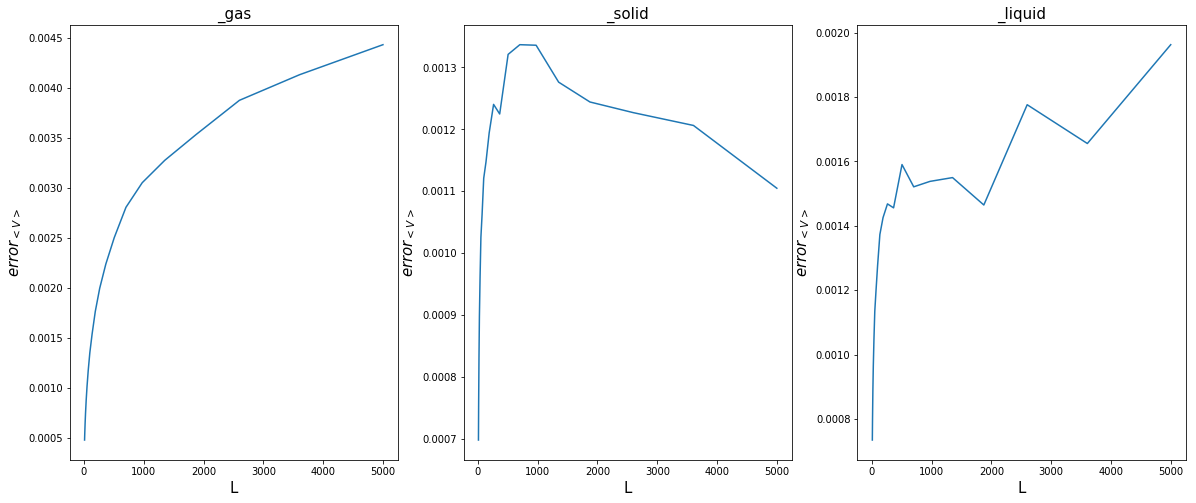

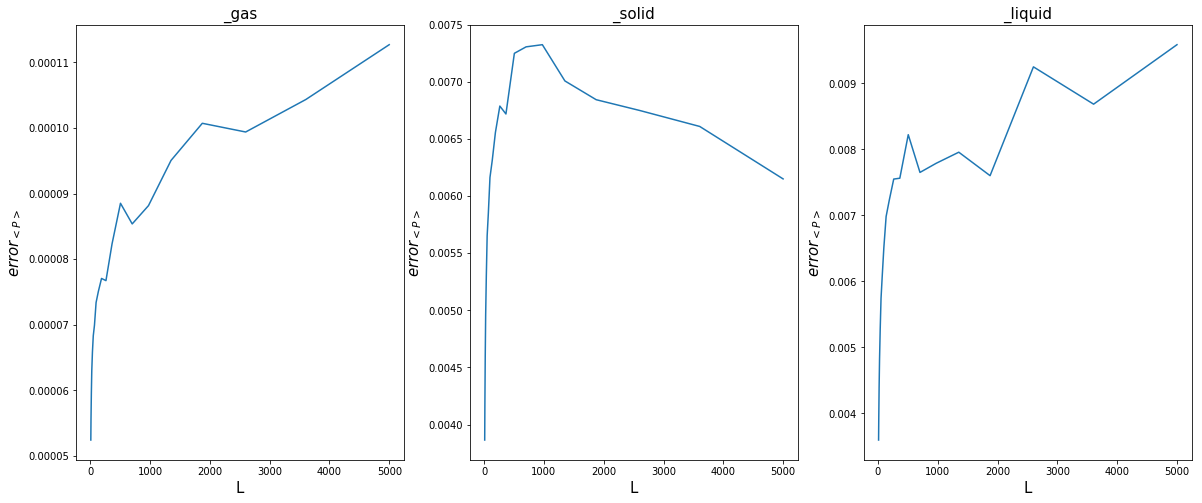

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def error(AV,AV2,n):  # Function for statistical uncertainty estimation, come nella spiegazione sotto
    if n==0: #non ha senso calcolarla se ho 0, il blocco è un singolo esperimento con M/N tentativi di osservare
            #la variabile A
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/(n))

pot_gas = np.loadtxt("autocorr/gas_instepot.out",usecols=(0), delimiter=' ', unpack='true')
press_gas = np.loadtxt("autocorr/gas_instpress.out",usecols=(0), delimiter=' ', unpack='true')
pot_solid = np.loadtxt("autocorr/solid_instepot.out",usecols=(0), delimiter=' ', unpack='true')
press_solid = np.loadtxt("autocorr/solid_instpress.out",usecols=(0), delimiter=' ', unpack='true')
pot_liquid = np.loadtxt("autocorr/liquid_instepot.out",usecols=(0), delimiter=' ', unpack='true')
press_liquid = np.loadtxt("autocorr/liquid_instpress.out",usecols=(0), delimiter=' ', unpack='true')

pot = pot_gas,pot_solid,pot_liquid
press = press_gas,press_solid,press_liquid
name = "_gas", "_solid","_liquid"
M=100000   

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(20, 8))

#Ls = [int(x) for x in np.linspace(10,5000,100)]
Ls = [int(x) for x in np.logspace(1,2+math.log10(50),20)]
print(Ls)

err = np.zeros(len(Ls))

for p in range(3):
    l=0
    for L in Ls:
        N = int(M/L)       
        ave = np.zeros(N)
        av2 = np.zeros(N)
        sum_prog = np.zeros(N)
        su2_prog = np.zeros(N)
        err_prog = np.zeros(N)
        for i in range(N):
            sum = 0
            for j in range(L):
                k = j+i*L
                sum += pot[p][k] #sto facendo il solido
            ave[i] = sum/L       
            av2[i] = (ave[i])**2  
        for i in range(N): 
            for j in range(i+1):
                sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
                su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
            sum_prog[i]/=(i+1) # Cumulative average
            su2_prog[i]/=(i+1) # Cumulative square average
            err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
        err[l] = err_prog[N-1]
        l+=1
    axs[p].plot(Ls,err)
    axs[p].set_xlabel('L',fontsize=15)
    axs[p].set_ylabel('$error_{<V>}$',fontsize=15)
    axs[p].set_title(name[p],fontsize=15)

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(20, 8))

for p in range(3):
    l=0
    for L in Ls:
        N = int(M/L)    
        ave = np.zeros(N)
        av2 = np.zeros(N)
        sum_prog = np.zeros(N)
        su2_prog = np.zeros(N)
        err_prog = np.zeros(N)
        for i in range(N):
            sum = 0
            for j in range(L):
                k = j+i*L
                #sum += pot_solid[k]
                sum += press[p][k] #sto facendo il solido
            ave[i] = sum/L       
            av2[i] = (ave[i])**2  
        for i in range(N): 
            for j in range(i+1):
                sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
                su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
            sum_prog[i]/=(i+1) # Cumulative average
            su2_prog[i]/=(i+1) # Cumulative square average
            err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
        err[l] = err_prog[N-1]
        l+=1
    axs[p].plot(Ls,err)
    axs[p].set_xlabel('L',fontsize=15)
    axs[p].set_ylabel('$error_{<P>}$',fontsize=15)
    axs[p].set_title(name[p],fontsize=15)
    
plt.show()


### ENTRANDO PIÙ IN DETTAGLIO

**Inizializzazione**  
  
Da terminale bisogna dare il parametro *restart*:  
-  $0$ --> la configurazione iniziale è un reticolo fcc 
- $1$ --> la configurazione iniziale è l'ultima configurazione assunta dalla simulazione precedente (dentro config.final)

Gli altri parametri vengono assegnati leggendo da *input.dat*.  
**input.dat**
- temperatura (unità di LJ, $\frac{\epsilon}{k_B}$)
- numero di particelle ($108$)
- densità di particelle (unità LJ, $\frac{1}{\sigma^3}$)
- r_{cutoff} (unità LJ, $\sigma$)
- $\delta$, per la mossa del Metropolis per proporre una nuova coordinata (unità LJ, $\sigma$)
- numero di blocchi per la simulazione
- numero di step per blocco

**avvio simulazione**  
  
Dopo aver analizzato in modo più approfondito cosa significhi analizzare i dati ottenuti da una simulazione tramite il metodo blocking mi accingo ad utilizzare il codice scritto per analizzare le proprietà fisiche del sistema.  
Come già anticipato per campionare le configurazioni del sistema, e quindi ottenere valori medi delle sue proprietà fisiche, viene utilizzato il campionamento di Metropolis.  
Questo viene eseguito chiamando la funzione $\texttt{move}$:  
- esegue un ciclo sul numero di particelle e per ogni coordinata della singola particella propone una nuova posizione. Questa nuova posizione viene ottenuta tramite una traslazione usando il generatore di numero casuali $\vec x_{new} = Pbc( \vec x_{old} + \vec \delta (r-0.5) )$, dove $r$ è un numero random generato in $[0,1]$ in modo uniforme e delta un parametro (reale in realtà, per ogni coordinata è $r$ diverso) letto da input.dat
- viene calcolata l'energia con questa nuova posizione e viene preso il $\min (1.,e^{(-\beta(E_{new}-E_{old})) })$
- viene generato un numero random che se minore del numero estrapolato nel punto precedente allora viene accettata la mossa proposta  
  
Oltre alla funzione $\texttt{move}$ è stata implementata anche la funzione $\texttt{measure}$ che misura le seguenti proprietà fisiche:  
- Energia potenziale 
- Pressione
- g(r) funzione di correlazione radiale (a coppie)  

**nota** : questa funzione ora viene chiamata ad ogni step, non ogni $10$ come invece ho fatto per l'esercitazione $04$. Qui la configurazione al tempo $t$ dipende solo dalla configurazione al tempo $t-dt$.  
  
Ho aggiunto il calcolo della $g(r)$ anche nel codice dell'esercitazione 04, per poi confrontare i risultati trovati. 
Il calcolo della $g(r)$ consiste semplicemente nel riempire un istogramma e contare quindi quante particelle (a coppie) distano entro una certa distanza e normalizzare ogni bin con la $g(r)$ del gas perfetto, cioè particelle non interagenti.    
Grazie alla funzione $g(r)$ è stato possibile anche ricavare le correzioni di *tail* al calcolo del potenziale e al calcolo del viriale. Ricordo che nel calcolo dell'energia potenziale abbiamo posto un $r_{cut}$. Per cui se la distanza tra due particelle è maggiore di questo raggio allora non viene calcolato il loro contributo all'energia. Per recuperare tale contributo abbiamo ricavato le correzioni di tail, che mostro di seguito senza soffermarmi troppo sulla parte teorica:  
$$\frac{V_{tail}}{N}= \pi 8 \rho [\frac{1}{9}(\frac{\sigma}{r_{cut}})^9-\frac{1}{3}(\frac{\sigma}{r_{cut}})^3]$$  
$$\frac{W_{tail}}{3N}= \pi 32 \rho [\frac{1}{9}(\frac{\sigma}{r_{cut}})^9-\frac{1}{3}(\frac{\sigma}{r_{cut}})^3]$$

### Exercise 07.2

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the Monte Carlo NVT code</span> we have provided: average value of $g(r)$ in each block (with output in the file: output.gofr.0), final average value of $g(r)$ with statistical uncertainties (with output in the file: output.gave.0).

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, inside the previously used Molecular Dynamics code</span>.

### CONFRONTO
  
È ora possibile confrontare i risultati ottenuti dalle due simulazioni (MD e MC). Per fare questo mi sono rifatto sempre al metodo blocking per l'analisi dati:  
- numero di blocchi $100$
- numero di misure per blocco $100$  
  
Ho confrontato non solo la funzione $g(r)$ ottenuta, ma anche il potenziale e la pressione dei diversi sistemi fisici.  
**NOTA** per la g(r) il metodo blocking viene svolto per ogni bin in cui ho diviso il mio intervallo spaziale (mezzo $r_{box}$ ), per cui i risultati visualizzati corrispondono all'ultimo valore ottenuto dall'analisi, con il suo errore, per ogni bin  
  
Nella prima parte ho eseguito i conti mantenendo le unità di Lennard-Jones, successivamente invece ho trasformato il tutto in unità del sistema internazionale per Argon e Krypton.  

### Exercise 07.4

By means of your upgraded MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) and Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

<span style="color:red">show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in SI units ... and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

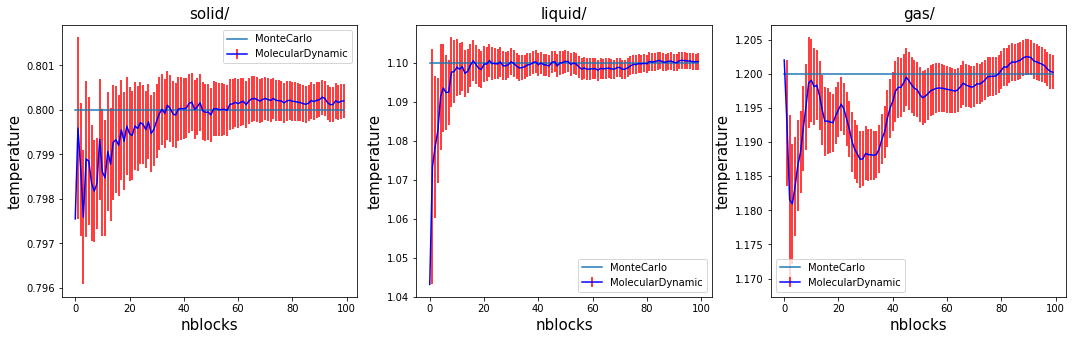

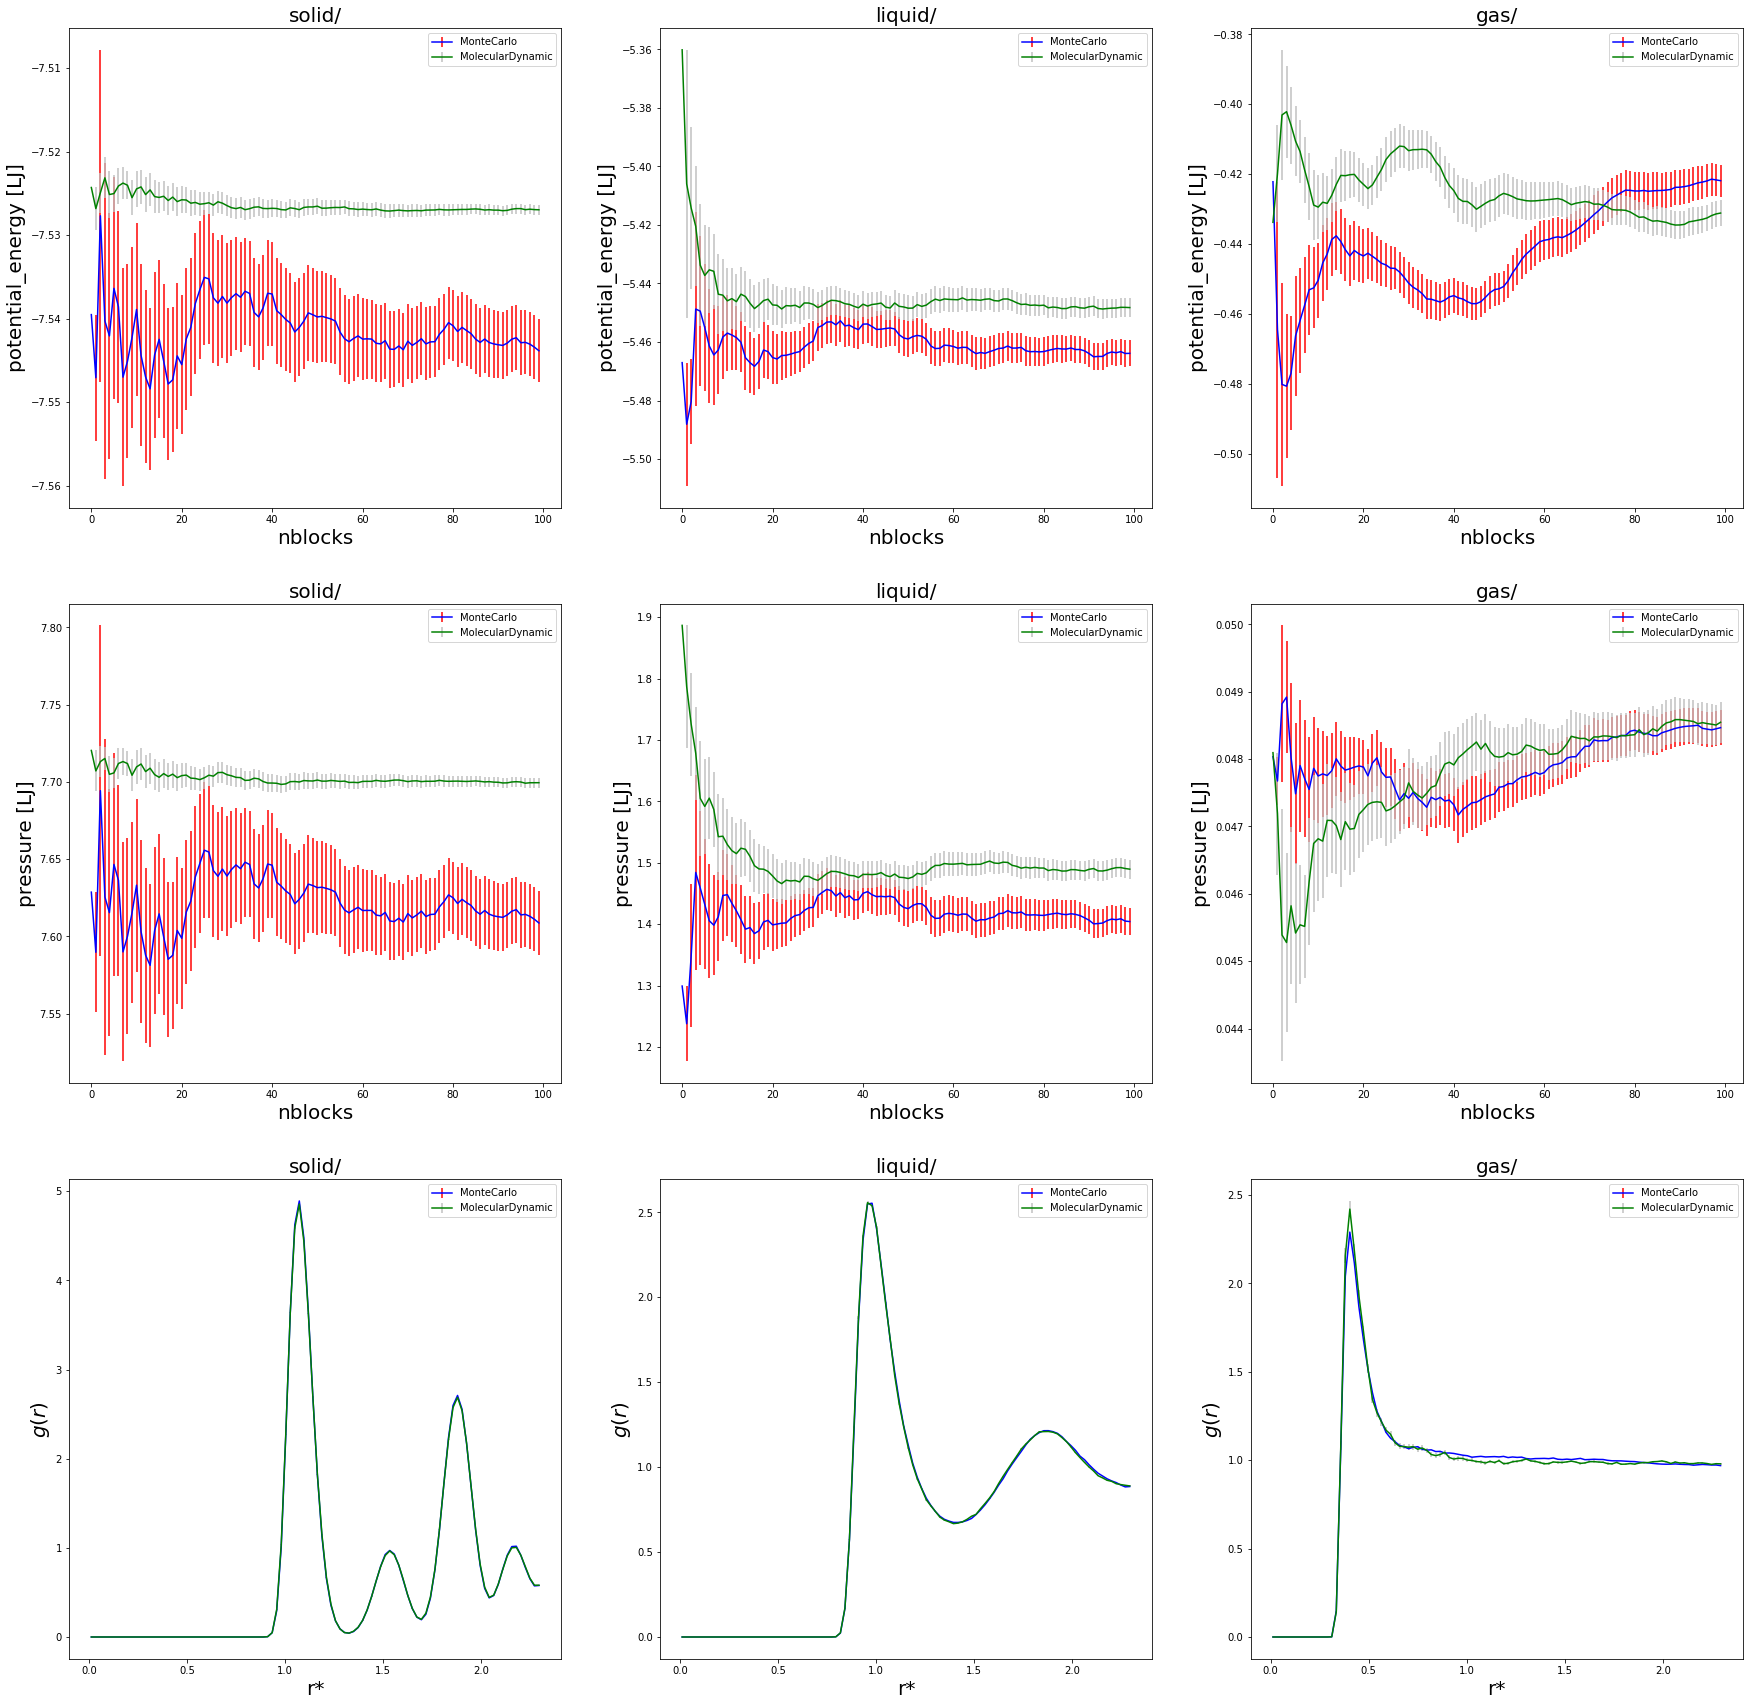

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


folder = "dati_MD/","dati_MC/"
subfolder = "solid/","liquid/","gas/"
nstep=100000
name_MD = "ave_epot"+str(nstep)+".out","ave_press"+str(nstep)+".out","output.gave.out"
name_MC = "output.epot.0","output.pres.0","output.gave.0"
model = "MonteCarlo","MolecularDynamic"
y_lab = "potential_energy [LJ]","pressure [LJ]","$g(r)$"
e_col = "red","blue","green","silver","cyan","ivory","orchid"


N=100
x = np.arange(N)

####################### UNITÀ LJ #########################

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(18, 5)) #su ciascuna colonna solid,liquido,gas
temperature = 0.8,1.1,1.2
for i in range(3):
    y = np.full(N,temperature[i])
    sum_prog,err_prog = np.loadtxt("dati_MD/"+subfolder[i]+"ave_temp100000.out",usecols=(0,1),unpack='true')
    axs[i].errorbar(x,sum_prog,yerr=err_prog,color='b',ecolor='r')
    axs[i].set_xlabel("nblocks",fontsize=15)
    axs[i].set_ylabel("temperature",fontsize=15)
    axs[i].set_title(subfolder[i],fontsize=15)
    axs[i].plot(x,y)
    axs[i].legend(model)
    
fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(30, 30)) #su ciascuna colonna solid,liquido,gas

y = np.loadtxt(folder[1]+subfolder[0]+name_MC[2],usecols=(0),unpack='true')
for j in range(3):
        for i in range(3):
                if (j==2):
                    sum_prog,err_prog = np.loadtxt(folder[1]+subfolder[i]+name_MC[j],usecols=(1,2),unpack='true')
                    axs[j][i].errorbar(y,sum_prog,yerr=err_prog,color=e_col[1],ecolor=e_col[0])
                    axs[j][i].set_xlabel("r*",fontsize=20)
                    axs[j][i].set_ylabel(y_lab[j],fontsize=20)
                    #axs[j][i].legend(model)
                    axs[j][i].set_title(subfolder[i],fontsize=20)
                    sum_prog,err_prog = np.loadtxt(folder[0]+subfolder[i]+name_MD[j],usecols=(1,2),unpack='true')
                    axs[j][i].errorbar(y,sum_prog,yerr=err_prog,color=e_col[2],ecolor=e_col[3])
                    axs[j][i].legend(model)
                else:
                    sum_prog,err_prog = np.loadtxt(folder[1]+subfolder[i]+name_MC[j],usecols=(2,3),unpack='true')
                    axs[j][i].errorbar(x,sum_prog,yerr=err_prog,color=e_col[1],ecolor=e_col[0])
                    axs[j][i].set_xlabel("nblocks",fontsize=20)
                    axs[j][i].set_ylabel(y_lab[j],fontsize=20)
                    axs[j][i].set_title(subfolder[i],fontsize=20)
                    axs[j][i].legend(model)
                    sum_prog,err_prog = np.loadtxt(folder[0]+subfolder[i]+name_MD[j],usecols=(0,1),unpack='true')
                    axs[j][i].errorbar(x,sum_prog,yerr=err_prog,color=e_col[2],ecolor=e_col[3])
                    axs[j][i].legend(model)

plt.show()

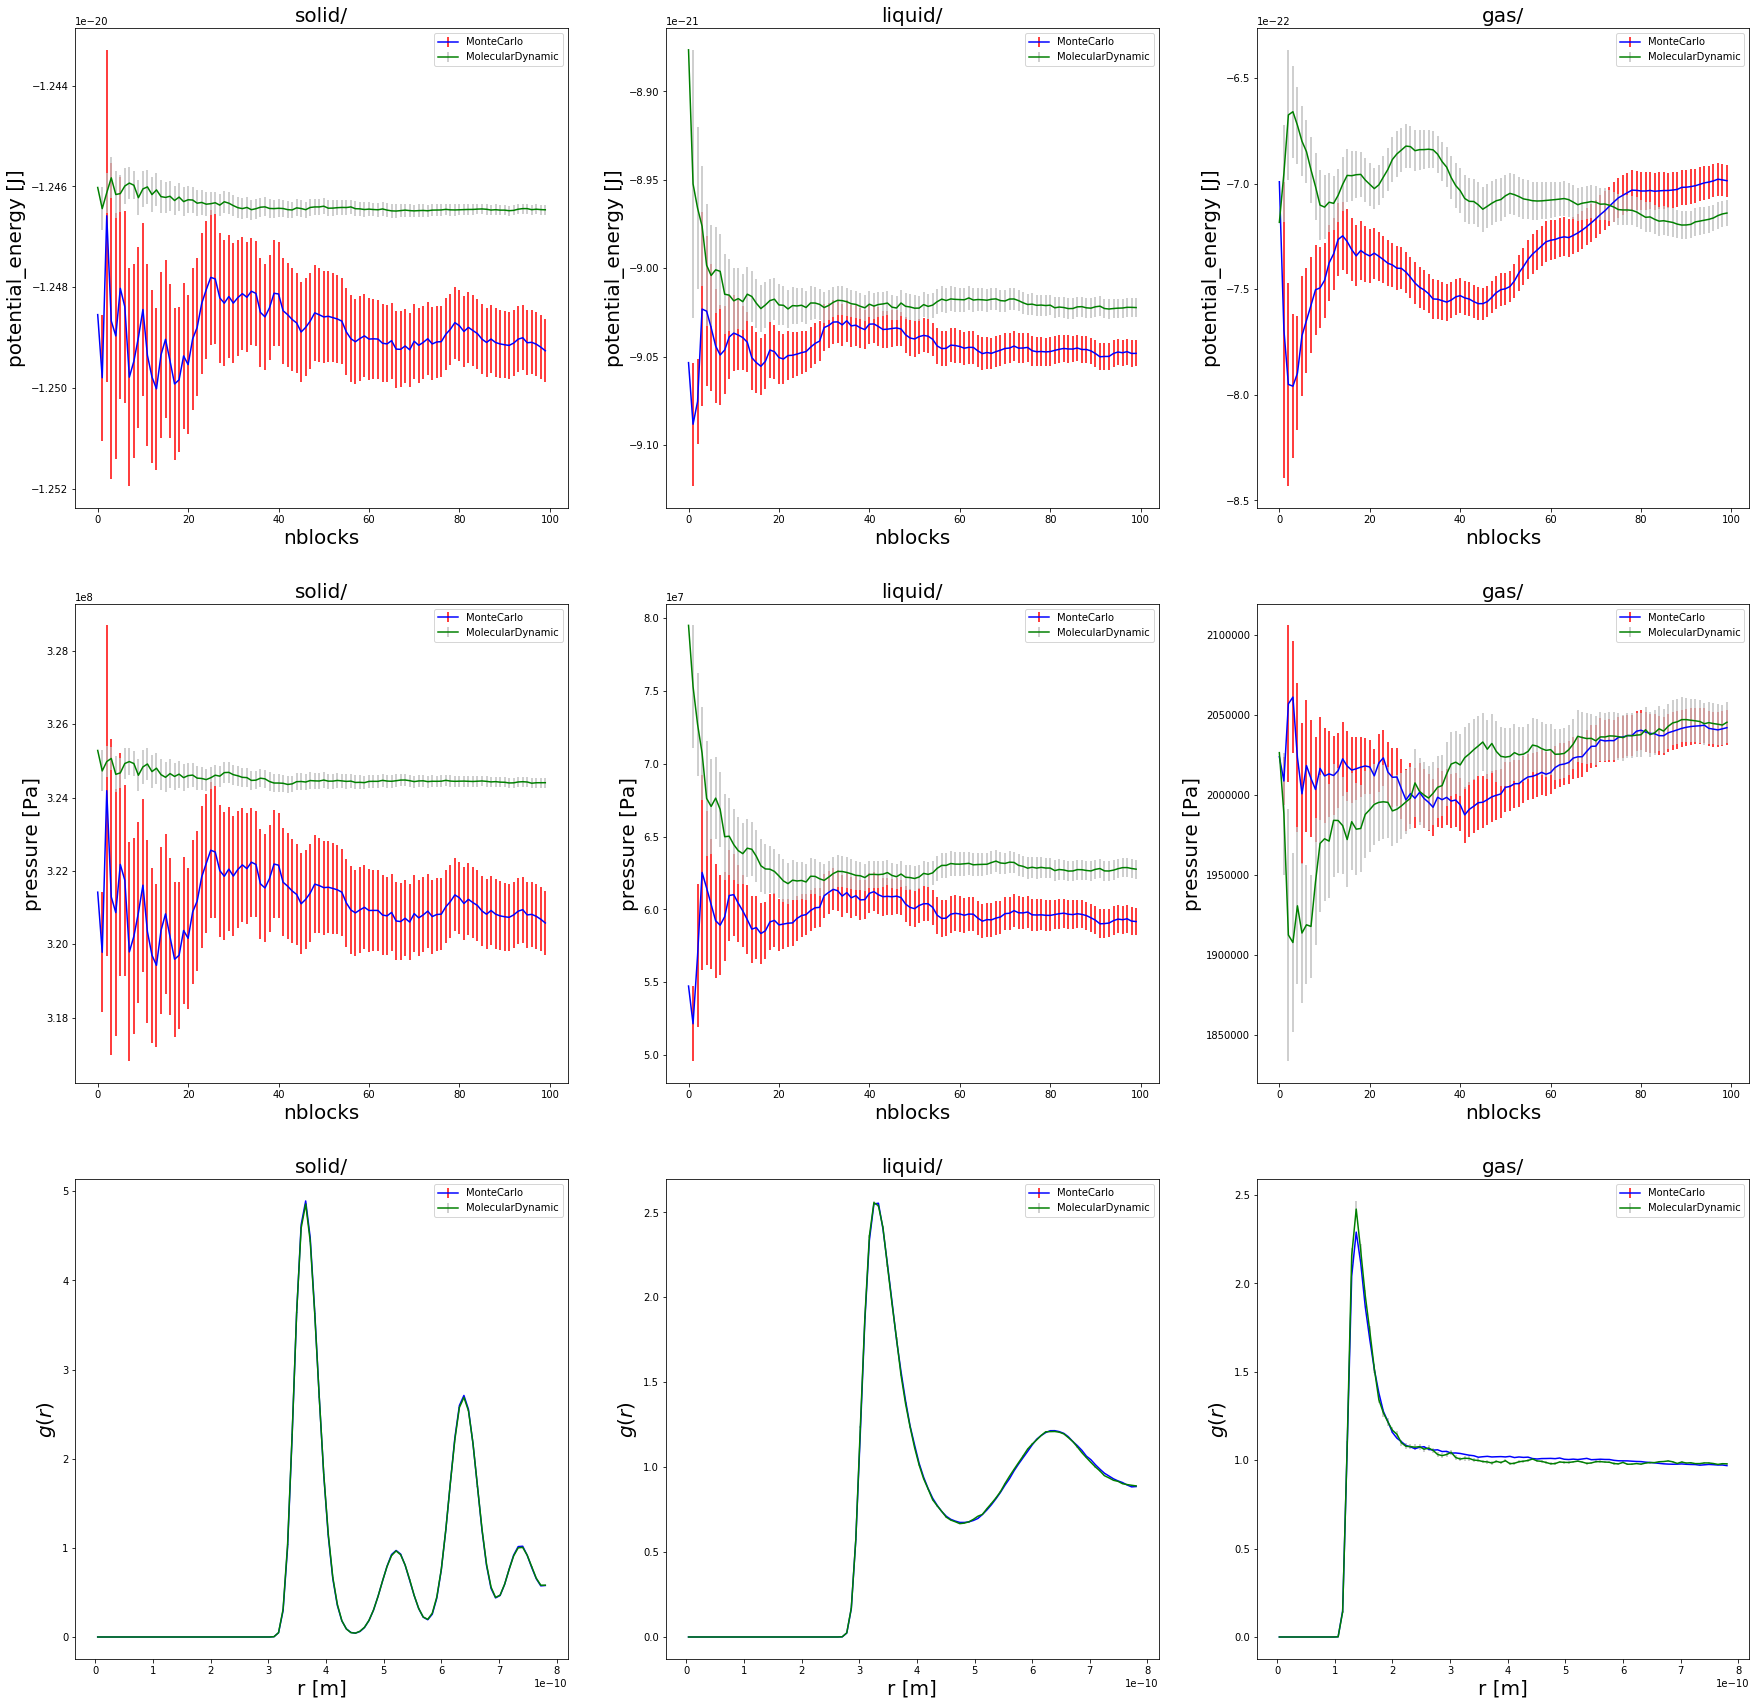

In [10]:
y_lab = "potential_energy [J]","pressure [Pa]","$g(r)$"

######## Argon ##########
sigma = 0.34e-9
eps_kb = 120
Eps = eps_kb*(1.38e-23)
m = 39.948

#pres_factor = Eps/sigma**3
#temp__factor = eps_kb
#energy_factor = Eps

factor = Eps,Eps/sigma**3

fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(30, 30))

y = np.loadtxt(folder[1]+subfolder[0]+name_MC[2],usecols=(0),unpack='true')
y = y*sigma



for j in range(3):
        for i in range(3):
                if (j==2):
                    sum_prog,err_prog = np.loadtxt(folder[1]+subfolder[i]+name_MC[j],usecols=(1,2),unpack='true')
                    axs[j][i].errorbar(y,sum_prog,yerr=err_prog,color=e_col[1],ecolor=e_col[0])
                    axs[j][i].set_xlabel("r [m]",fontsize=20)
                    axs[j][i].set_ylabel(y_lab[j],fontsize=20)
                    #axs[j][i].legend(model)
                    axs[j][i].set_title(subfolder[i],fontsize=20)
                    sum_prog,err_prog = np.loadtxt(folder[0]+subfolder[i]+name_MD[j],usecols=(1,2),unpack='true')
                    axs[j][i].errorbar(y,sum_prog,yerr=err_prog,color=e_col[2],ecolor=e_col[3])
                    axs[j][i].legend(model)
                else:
                    sum_prog,err_prog = np.loadtxt(folder[1]+subfolder[i]+name_MC[j],usecols=(2,3),unpack='true')
                    sum_prog*=factor[j]
                    err_prog*=factor[j]
                    axs[j][i].errorbar(x,sum_prog,yerr=err_prog,color=e_col[1],ecolor=e_col[0])
                    axs[j][i].set_xlabel("nblocks",fontsize=20)
                    axs[j][i].set_ylabel(y_lab[j],fontsize=20)
                    axs[j][i].set_title(subfolder[i],fontsize=20)
                    axs[j][i].legend(model)
                    sum_prog,err_prog = np.loadtxt(folder[0]+subfolder[i]+name_MD[j],usecols=(0,1),unpack='true')
                    sum_prog*=factor[j]
                    err_prog*=factor[j]
                    axs[j][i].errorbar(x,sum_prog,yerr=err_prog,color=e_col[2],ecolor=e_col[3])
                    axs[j][i].legend(model)
                    
plt.show()
                    

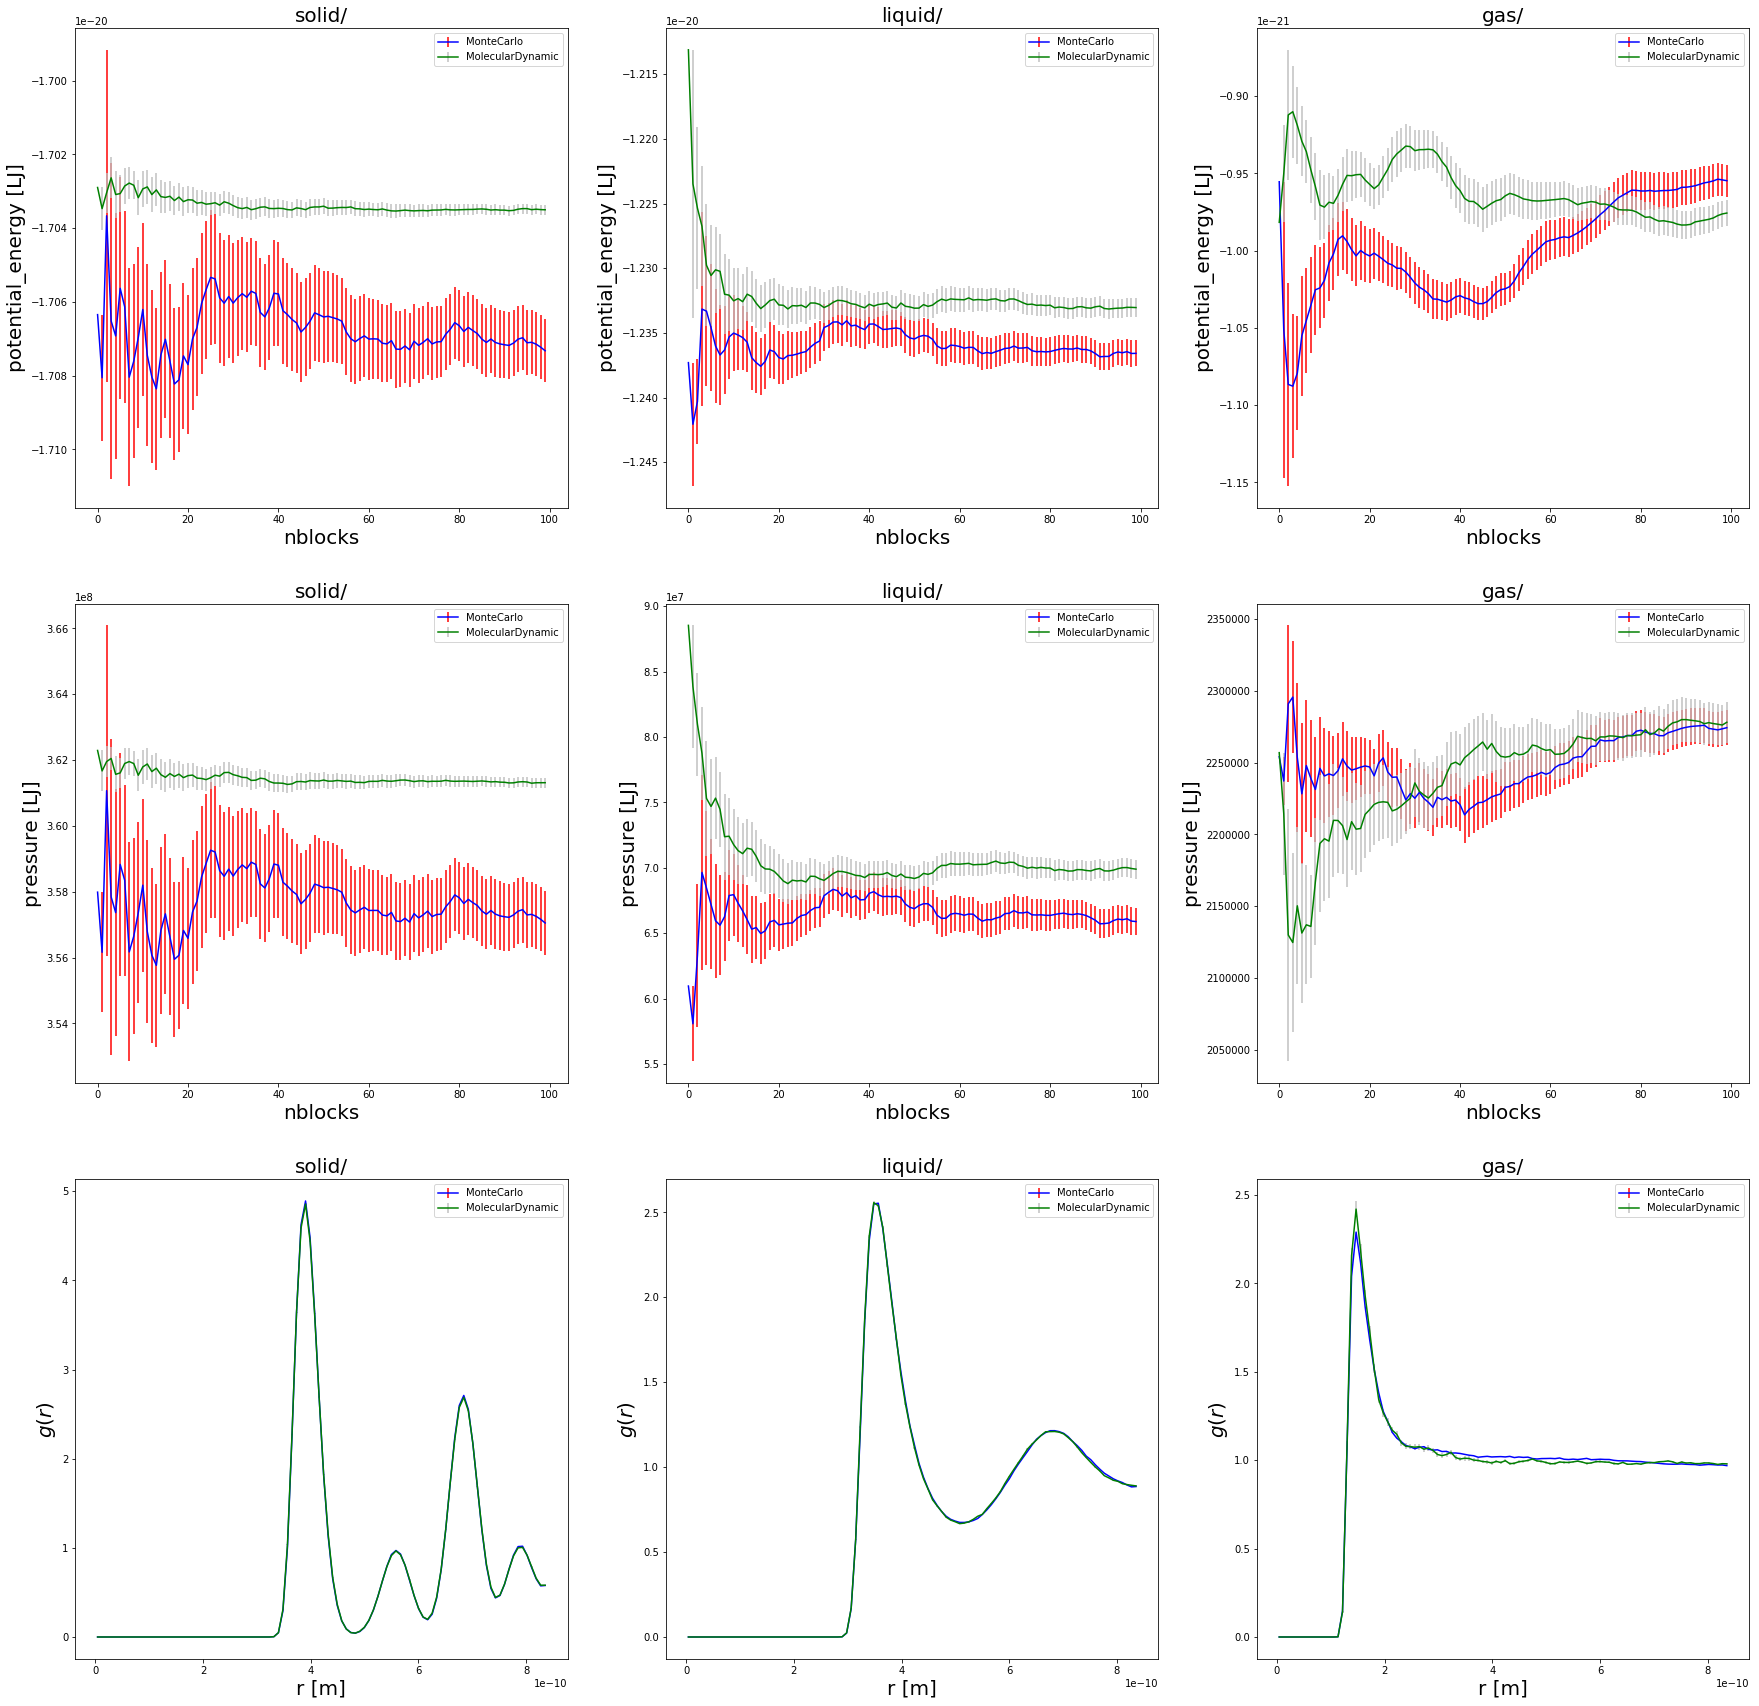

In [19]:
######## Krypton ##########
sigma = 0.364e-9
eps_kb = 164
Eps = eps_kb*(1.38e-23)
m = 83.798

factor = Eps,Eps/sigma**3

fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(30, 30))

y = np.loadtxt(folder[1]+subfolder[0]+name_MC[2],usecols=(0),unpack='true')
y = y*sigma



for j in range(3):
        for i in range(3):
                if (j==2):
                    sum_prog,err_prog = np.loadtxt(folder[1]+subfolder[i]+name_MC[j],usecols=(1,2),unpack='true')
                    axs[j][i].errorbar(y,sum_prog,yerr=err_prog,color=e_col[1],ecolor=e_col[0])
                    axs[j][i].set_xlabel("r [m]",fontsize=20)
                    axs[j][i].set_ylabel(y_lab[j],fontsize=20)
                    #axs[j][i].legend(model)
                    axs[j][i].set_title(subfolder[i],fontsize=20)
                    sum_prog,err_prog = np.loadtxt(folder[0]+subfolder[i]+name_MD[j],usecols=(1,2),unpack='true')
                    axs[j][i].errorbar(y,sum_prog,yerr=err_prog,color=e_col[2],ecolor=e_col[3])
                    axs[j][i].legend(model)
                else:
                    sum_prog,err_prog = np.loadtxt(folder[1]+subfolder[i]+name_MC[j],usecols=(2,3),unpack='true')
                    sum_prog*=factor[j]
                    err_prog*=factor[j]
                    axs[j][i].errorbar(x,sum_prog,yerr=err_prog,color=e_col[1],ecolor=e_col[0])
                    axs[j][i].set_xlabel("nblocks",fontsize=20)
                    axs[j][i].set_ylabel(y_lab[j],fontsize=20)
                    axs[j][i].set_title(subfolder[i],fontsize=20)
                    axs[j][i].legend(model)
                    sum_prog,err_prog = np.loadtxt(folder[0]+subfolder[i]+name_MD[j],usecols=(0,1),unpack='true')
                    sum_prog*=factor[j]
                    err_prog*=factor[j]
                    axs[j][i].errorbar(x,sum_prog,yerr=err_prog,color=e_col[2],ecolor=e_col[3])
                    axs[j][i].legend(model)
                    
plt.show()

#### COMMENTO
I risultati ottenuti sono tra loro compatibili, soprattutto quelli relativi alla $g(r)$.  
È interessante notare però come per la fase solida il valore dell'energia potenziale e della pressione siano compatibili entro $2\sigma$ e mezzo. Sarebbe interessante provare ad aumentare il numero di particelle oppure avvicinare ancora di più il sistema microcanico alla temperatura target.  
Un'altra cosa interessante è notare quantitativamente quanto cambino gli errori nel caso delle quantità fisiche del solido. L'errore nel caso della simulazione di Molecular Dynamics risulta essere $2/3$ volte più piccolo rispetto a quello ricavato con il metodo MC. Il sistema solido è molto stabile ed equilibrato nella simulazione di MD, ciò significa che le fluttazioni relative ai valori istantanei delle proprietà fisiche del sistema solido sono minori rispetto a quello ottenute con MC. Perchè con MC non si fa evolvere il sistema seguendo una dinamica ma campionando lo spazio delle fasi, quindi osservando configurazione consecutive che possono ovviamente portare a maggiori fluttuazioni.  
Quello che si potrebbe fare è diminuire la $\delta$ per lo step MC Metropolis per proporre mosse in cui si spostano meno le varie coordinate. In questo modo mi aspetto di aumentare l'accetazione del Metropolis (io ho settato la $\delta$ in modo tale da avere accettazione $0.5$ circa).  

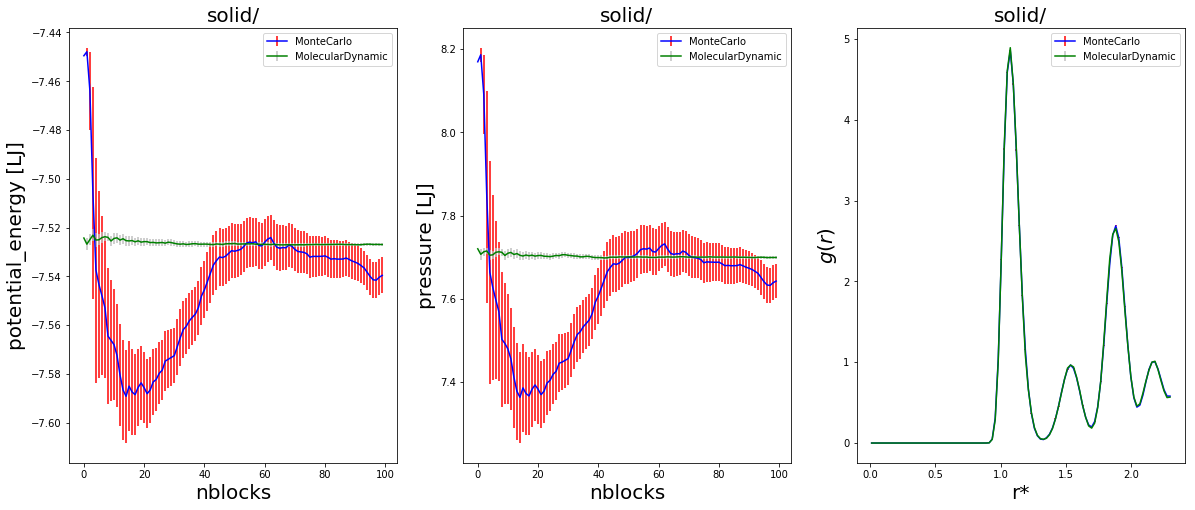

In [28]:
F = "solid_small_delta/"
folder = "dati_MD/","dati_MC/"
subfolder = "solid/","liquid/","gas/"
nstep=100000
name_MD = "ave_epot"+str(nstep)+".out","ave_press"+str(nstep)+".out","output.gave.out"
name_MC = "output.epot.0","output.pres.0","output.gave.0"
model = "MonteCarlo","MolecularDynamic"
y_lab = "potential_energy [LJ]","pressure [LJ]","$g(r)$"
e_col = "red","blue","green","silver","cyan","ivory","orchid"


N=100
x = np.arange(N)

####################### UNITÀ LJ #########################
    
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(20, 8)) #su ciascuna colonna solid,liquido,gas

y = np.loadtxt(folder[1]+subfolder[0]+name_MC[2],usecols=(0),unpack='true')
for j in range(3):
    if (j==2):
        sum_prog,err_prog = np.loadtxt(folder[0]+subfolder[0]+name_MD[j],usecols=(1,2),unpack='true')
        axs[j].errorbar(y,sum_prog,yerr=err_prog,color=e_col[1],ecolor=e_col[0])
        axs[j].set_xlabel("r*",fontsize=20)
        axs[j].set_ylabel(y_lab[j],fontsize=20)
        axs[j].set_title(subfolder[0],fontsize=20)
        sum_prog,err_prog = np.loadtxt(F+name_MC[j],usecols=(1,2),unpack='true')
        axs[j].errorbar(y,sum_prog,yerr=err_prog,color=e_col[2],ecolor=e_col[3])
        axs[j].legend(model)
    else:
        sum_prog,err_prog = np.loadtxt(F+name_MC[j],usecols=(2,3),unpack='true')
        axs[j].errorbar(x,sum_prog,yerr=err_prog,color=e_col[1],ecolor=e_col[0])
        axs[j].set_xlabel("nblocks",fontsize=20)
        axs[j].set_ylabel(y_lab[j],fontsize=20)
        axs[j].set_title(subfolder[0],fontsize=20)
        axs[j].legend(model)
        sum_prog,err_prog = np.loadtxt(folder[0]+subfolder[0]+name_MD[j],usecols=(0,1),unpack='true')
        axs[j].errorbar(x,sum_prog,yerr=err_prog,color=e_col[2],ecolor=e_col[3])
        axs[j].legend(model)

plt.show()

I grafici sopra mostrati sono stati ottenuti facendo 100 blocchi da 100 step e ponendo un $\delta = 0.01$. L'accettazione così è salita a $95\%$. Gli errori non sembrano diminuiti, anzi di poco aumentati o restano i medesimi. Sarebbe interessante capire cosa sta succedendo e perchè.    